<a href="https://colab.research.google.com/github/junekimdev/kdt-autodrive4-team3-week11-12/blob/dahyunk_week11/Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/라벨링

/content/drive/MyDrive/라벨링


In [ ]:
ls

Annotations/  Images/  빨간불/  초록불/


In [ ]:
cd ../video22_img_anno

/content/drive/MyDrive/라벨링/video22_img_anno


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
annots = os.listdir("Annotations")
images = os.listdir("Images")

annots.sort()
images.sort()
print(len(annots), len(images))

72 72


In [ ]:
object_detector = []
for idx in range(72):
  txt_file = open("Annotations/" + annots[idx], "r")
  lines = txt_file.readlines()
  list1 = []
  for line in lines:
    list1.append(list(map(float, line.split())))
  object_detector.append(list1)
  txt_file.close()
print(object_detector)

[[[1.0, 0.347826, 0.492798, 0.185061, 0.220165]], [[1.0, 0.326087, 0.494856, 0.212932, 0.269547]], [[6.0, 0.940357, 0.462963, 0.016722, 0.024691], [5.0, 0.849498, 0.423868, 0.053512, 0.131687]], [[5.0, 0.860647, 0.430041, 0.051282, 0.135802]], [[5.0, 0.877926, 0.424897, 0.059086, 0.146091]], [[5.0, 0.787068, 0.417695, 0.055741, 0.148148]], [[5.0, 0.62932, 0.420782, 0.059086, 0.154321]], [[5.0, 0.530658, 0.412551, 0.06689, 0.154321]], [[5.0, 0.512821, 0.417695, 0.06466, 0.144033]], [[5.0, 0.395206, 0.416667, 0.063545, 0.150206]], [[5.0, 0.400223, 0.434156, 0.06466, 0.164609], [6.0, 0.92029, 0.0607, 0.059086, 0.088477]], [[5.0, 0.399108, 0.437243, 0.06466, 0.158436], [3.0, 0.831661, 0.150206, 0.051282, 0.090535]], [[1.0, 0.313824, 0.494856, 0.219621, 0.306584]], [[5.0, 0.398551, 0.434156, 0.065775, 0.148148], [3.0, 0.755853, 0.242798, 0.046823, 0.082305]], [[6.0, 0.696767, 0.33642, 0.055741, 0.076132], [5.0, 0.399108, 0.441358, 0.069119, 0.154321]], [[0.0, 0.65942, 0.41358, 0.045708, 0.0

In [ ]:
classes = ["left", "right", "stop", "cross_walk", "uturn", "traffic_light"]

In [ ]:
object_detector[0]

[[1.0, 0.347826, 0.492798, 0.185061, 0.220165]]

In [ ]:
from PIL import Image
from PIL import ImageDraw

In [ ]:
annots[42]

'video22_47.txt'

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

# Traffic_Light Decision Making

## Green

In [ ]:
for li in object_detector[42]:
    cls = int(li[0])
    if cls == 5:
      cx, cy, w, h = li[1], li[2], li[3], li[4]
      sample = cv2.imread('Images/'+images[42])
      cv2_imshow(sample[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/2)*416):int((cx+w/2)*416)])
    else:
      continue


In [ ]:
traffic_image = sample[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/2)*416):int((cx+w/2)*416)]
hsv_img = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2GRAY)
dst_img = cv2.bilateralFilter(gray, -1, 10, 10)
cv2_imshow(gray)
cv2_imshow(dst_img)

circles = cv2.HoughCircles(dst_img, cv2.HOUGH_GRADIENT, 1, 100, param1 = 250, param2 = 10, minRadius = 5, maxRadius = 20)
circles = np.uint16(np.around(circles))
print(circles)
for i in circles[0,:]:
    cx, cy, r = i[0], i[1], i[2]
    # cv2.circle(traffic_image, (i[0], i[1]), i[2], (0, 0, 255), 1)
# cv2_imshow(traffic_image)

cv2_imshow(traffic_image[cy-r:cy+r,cx-r:cx+r])
new = traffic_image[cy-r:cy+r,cx-r:cx+r]
lower_green = (0,0,0)
upper_green = (0, 0, 100)
img_hsv = cv2.cvtColor(new, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)
img_mask = cv2.inRange(img_hsv, lower_green, upper_green)
img_result = cv2.bitwise_and(new,new,mask=img_mask)
cv2_imshow(img_result)

[[[14 54  7]]]


## Yellow

In [ ]:
for li in object_detector[70]:
    cls = int(li[0])
    if cls == 5:
      cx, cy, w, h = li[1], li[2], li[3], li[4]
      sample = cv2.imread('Images/'+images[70])
      cv2_imshow(sample[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/2)*416):int((cx+w/2)*416)])
    else:
      continue

In [ ]:
traffic_image = sample[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/2)*416):int((cx+w/2)*416)]
hsv_img = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2GRAY)
dst_img = cv2.bilateralFilter(gray, -1, 10, 10)
# cv2_imshow(gray)
# cv2_imshow(dst_img)

circles = cv2.HoughCircles(dst_img, cv2.HOUGH_GRADIENT, 1, 100, param1 = 250, param2 = 10, minRadius = 5, maxRadius = 20)
circles = np.uint16(np.around(circles))
print(circles)
for i in circles[0,:]:
    cx, cy, r = i[0], i[1], i[2]
    # cv2.circle(traffic_image, (i[0], i[1]), i[2], (0, 0, 255), 1)
# cv2_imshow(traffic_image)

cv2_imshow(traffic_image[cy-r:cy+r,cx-r:cx+r])

[[[12 26  6]]]


## Red

In [ ]:
for li in object_detector[54]:
    cls = int(li[0])
    if cls == 5:
      cx, cy, w, h = li[1], li[2], li[3], li[4]
      sample = cv2.imread('Images/'+images[54])
      cv2_imshow(sample[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/2)*416):int((cx+w/2)*416)])
    else:
      continue

In [ ]:
traffic_image = sample[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/2)*416):int((cx+w/2)*416)]
hsv_img = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(traffic_image, cv2.COLOR_BGR2GRAY)
dst_img = cv2.bilateralFilter(gray, -1, 10, 10)
cv2_imshow(gray)
cv2_imshow(dst_img)

circles = cv2.HoughCircles(dst_img, cv2.HOUGH_GRADIENT, 1, 100, param1 = 250, param2 = 10, minRadius = 5, maxRadius = 20)
circles = np.uint16(np.around(circles))
print(circles)
for i in circles[0,:]:
    cx, cy, r = i[0], i[1], i[2]
    # cv2.circle(traffic_image, (i[0], i[1]), i[2], (0, 0, 255), 1)
# cv2_imshow(traffic_image)

cv2_imshow(traffic_image[cy-r:cy+r,cx-r:cx+r])

[[[16 32  7]]]


## 컨트롤

In [ ]:
def control(list_, idx):
  stack = []
#### 확인용 코드##########################################
  img_open = Image.open(f'Images/{images[idx]}').convert('RGB')

  img_draw = ImageDraw.Draw(img_open,'RGBA')
#####################################################

  sqare_min = 400
  sqare_max = 800
  for li in list_:
    cls, cx, cy, w, h = int(li[0]), li[1], li[2], li[3], li[4]
    sqare = w*416*h*416
#### 확인용 코드 #############################################
    img_draw.rectangle([(cx-w/2)*416, (cy-h/2)*416, (cx+w/2)*416 , (cy+h/2)*416],outline = (0,255,0,255),fill = (0,255,0,30),width = 2)
    print("넓이는 ", w*416* h*416)
####################################################################   

    if sqare > sqare_min and sqare < sqare_max:
      if cls == 0:
        stack.append("좌회전")
      elif cls == 1:
        stack.append("우회전")
      elif cls == 2 or 3 or 6:
        stack.append("정지")
      squre_min = sqare
      if len(stack) > 1:
        stack.pop(0)
  if len(stack) == 0:
    print("lane_keeping")
  else:
    print(stack[-1])
##### 시각화 #################################################
  plt.figure(figsize=(20,10))
  plt.imshow(np.array(img_open))
  plt.show()

넓이는  1571.98785615872
lane_keeping


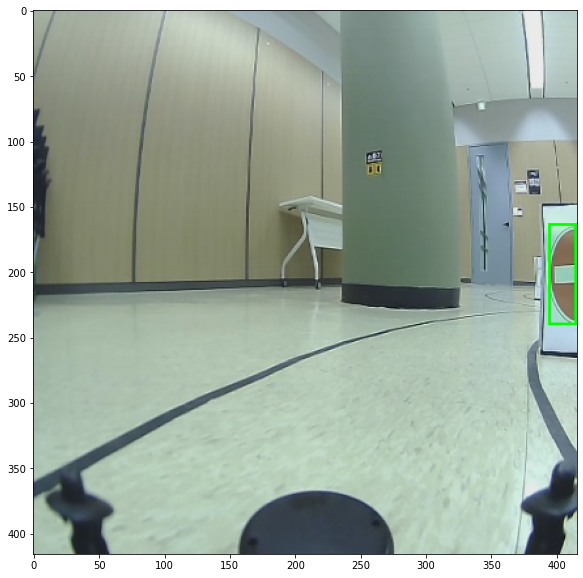

넓이는  650.241528308736
넓이는  328.6924512768
['정지']


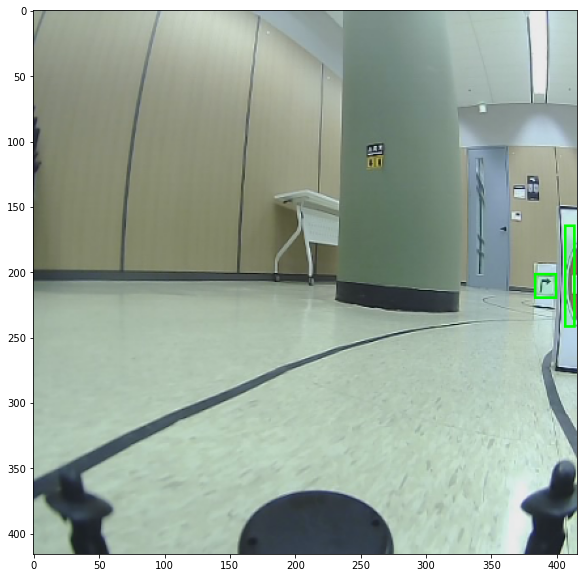

넓이는  301.2973187328
넓이는  3347.241598451712
lane_keeping


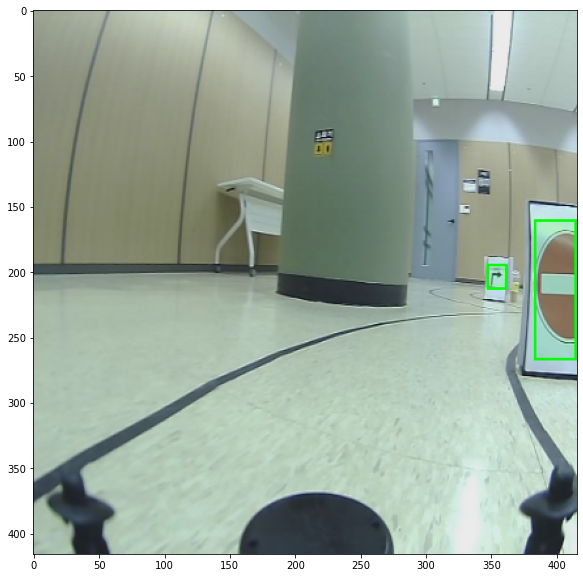

넓이는  362.035233690624
넓이는  5414.680055569409
lane_keeping


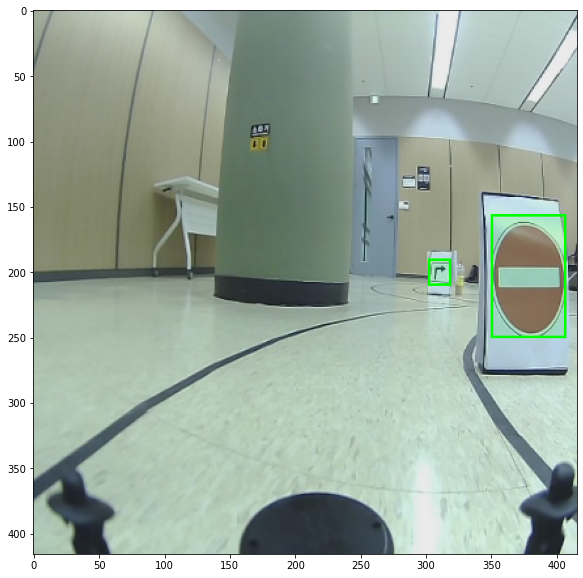

넓이는  362.035233690624
넓이는  6053.783425078273
lane_keeping


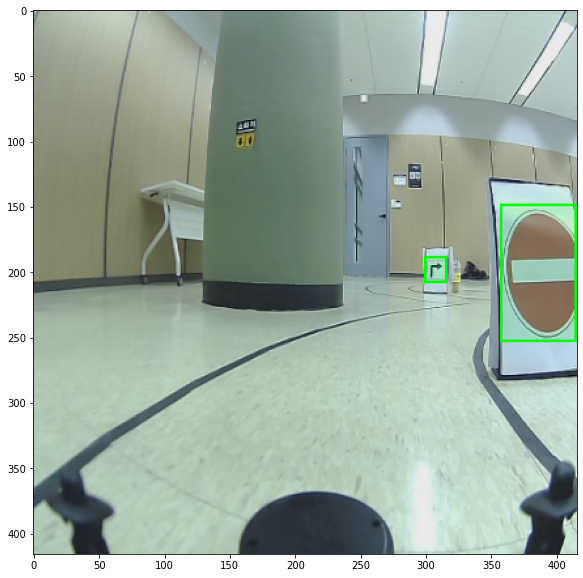

넓이는  340.598076229632
넓이는  4701.721714866177
lane_keeping


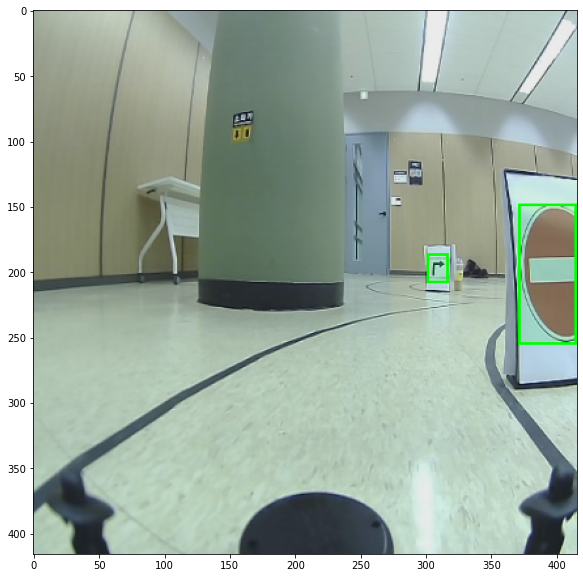

넓이는  2429.44743129088
lane_keeping


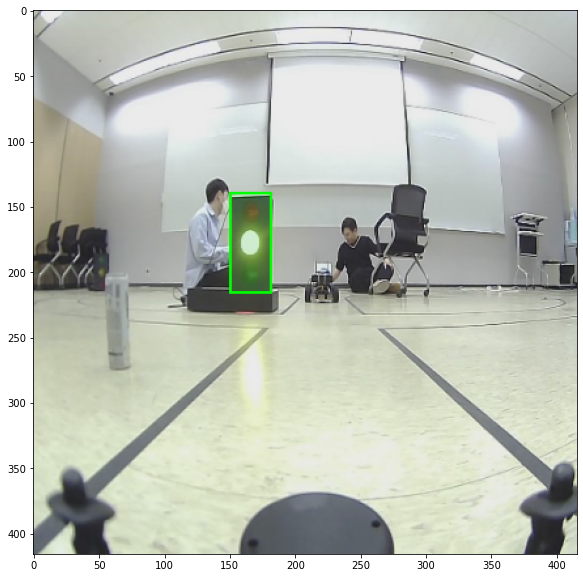

넓이는  444.604487701504
넓이는  4394.472208908288
['우회전']


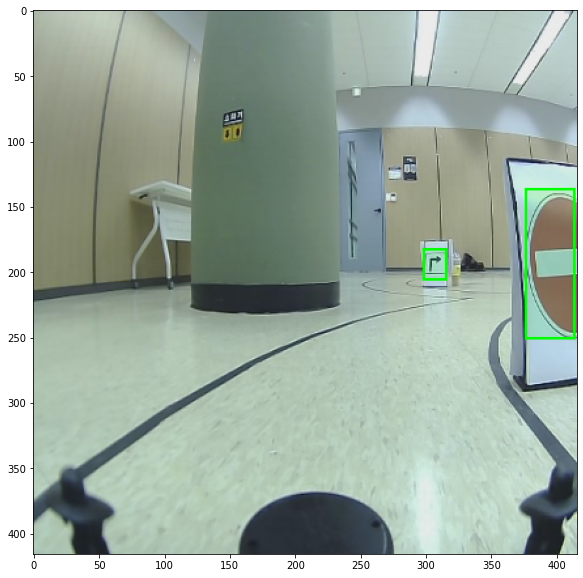

넓이는  383.47452648959995
넓이는  3261.507866825728
lane_keeping


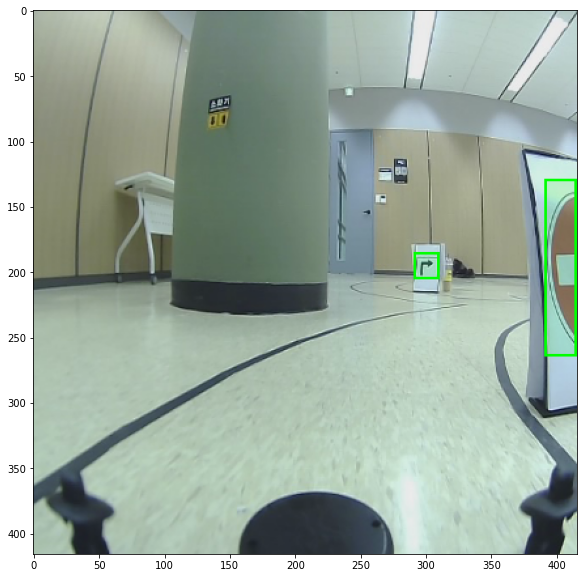

넓이는  477.955058673664
넓이는  1548.2033731706879
['우회전']


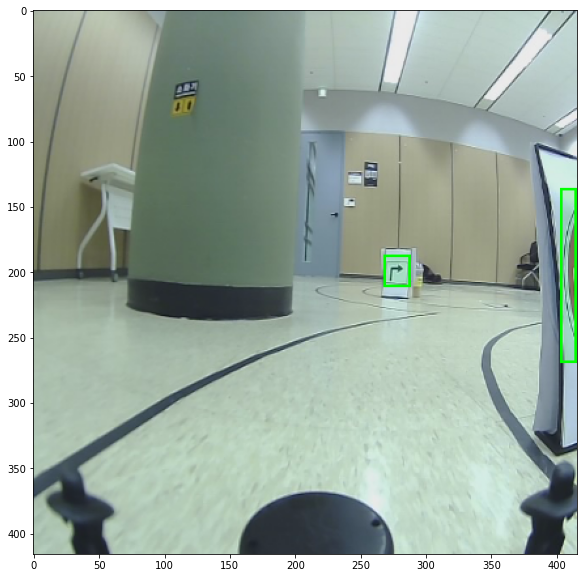

넓이는  401.72975831040003
넓이는  2833.158018689024
['우회전']


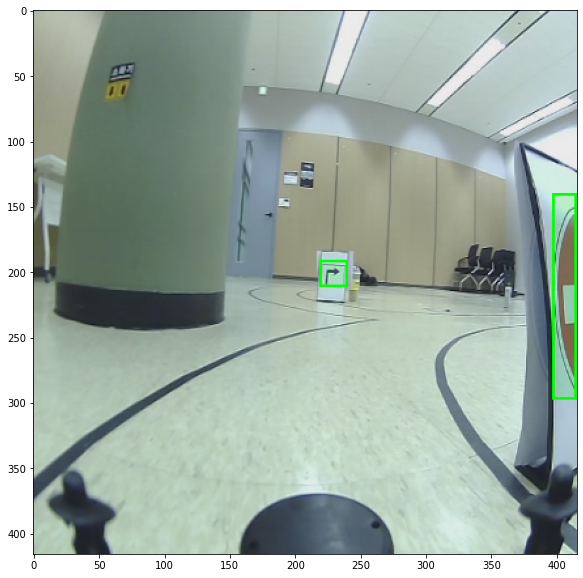

넓이는  464.45360543129595
넓이는  5372.566634133504
['우회전']


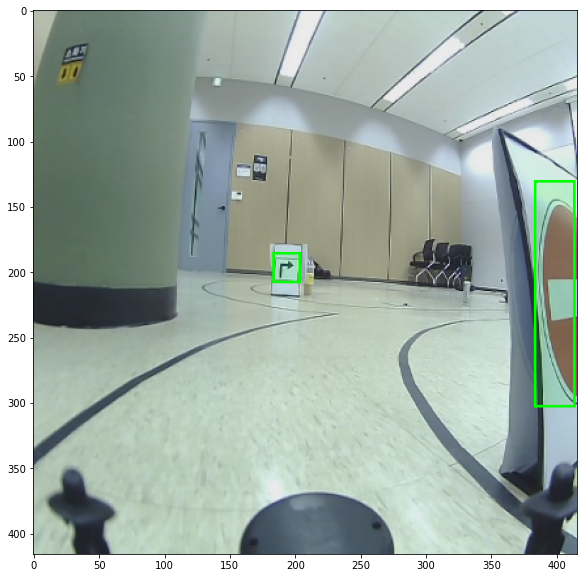

넓이는  409.67931998822405
넓이는  602.5946374656
['정지']


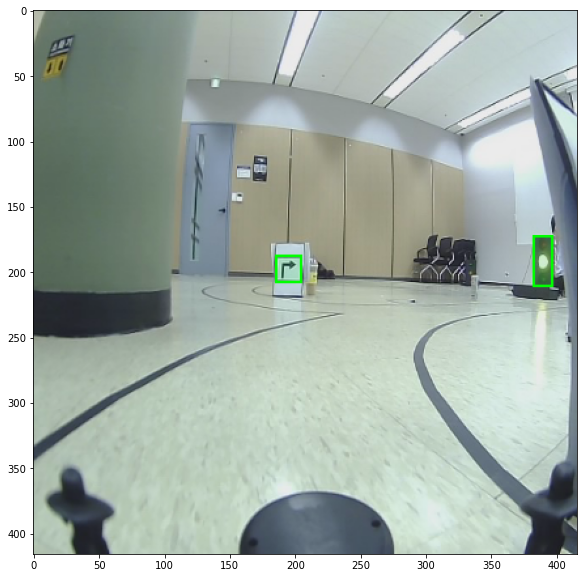

넓이는  464.45360543129595
넓이는  647.8504618393602
['정지']


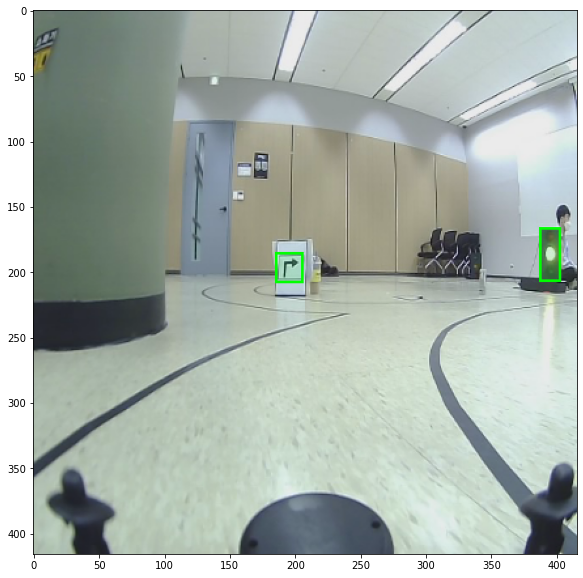

넓이는  419.199591223296
넓이는  825.697355911168
['우회전']


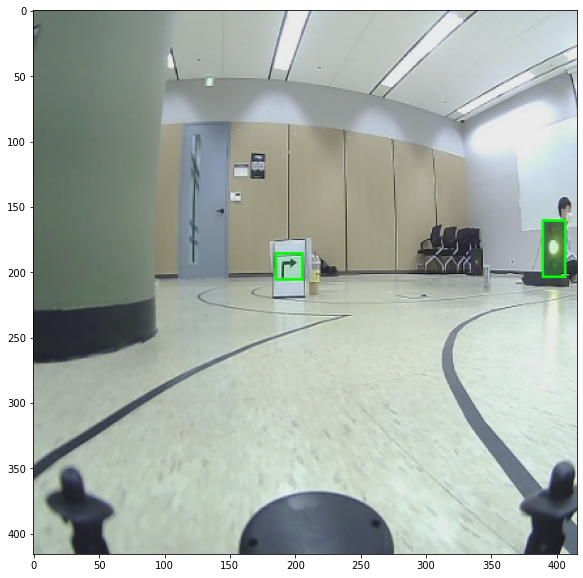

넓이는  598.633159095296
넓이는  673.249572882432
['정지']


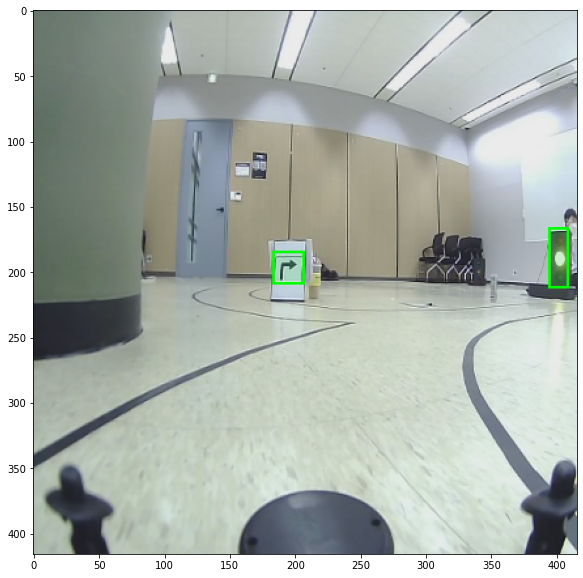

넓이는  598.6319717580799
넓이는  750.2730767400959
['우회전']


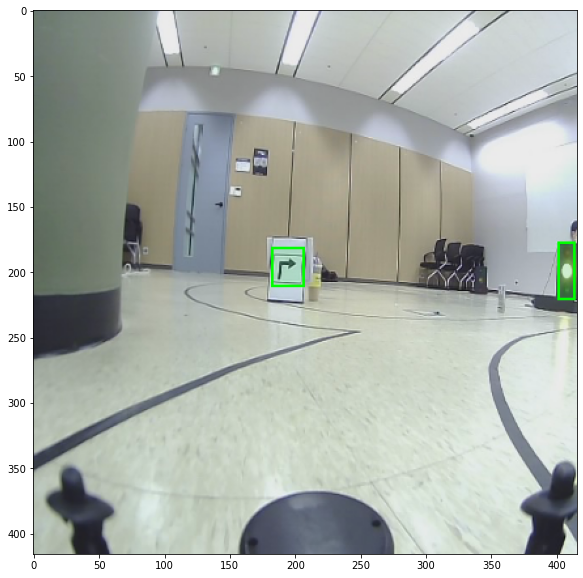

넓이는  2456.446393483264
lane_keeping


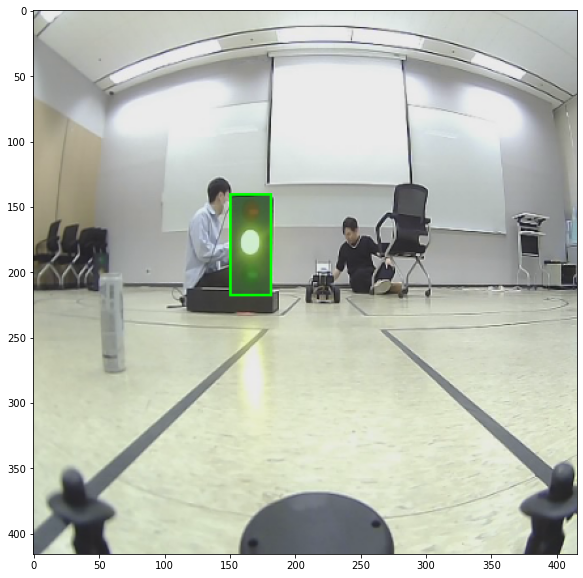

넓이는  825.697355911168
넓이는  724.0761647308801
['우회전']


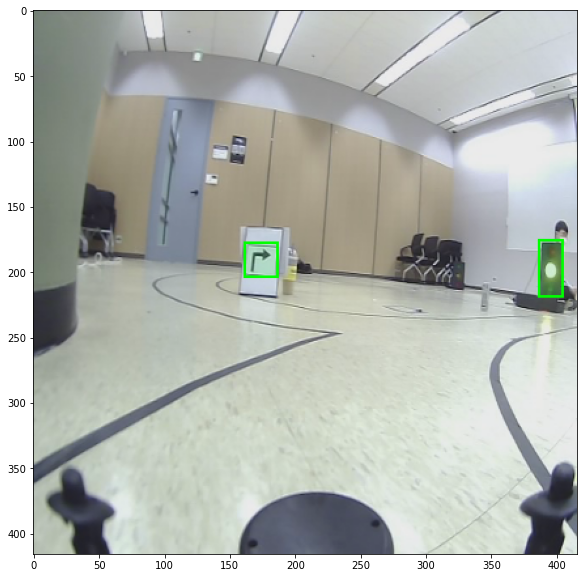

넓이는  787.590218428416
넓이는  809.815592495104
넓이는  100.039086923776
['우회전']


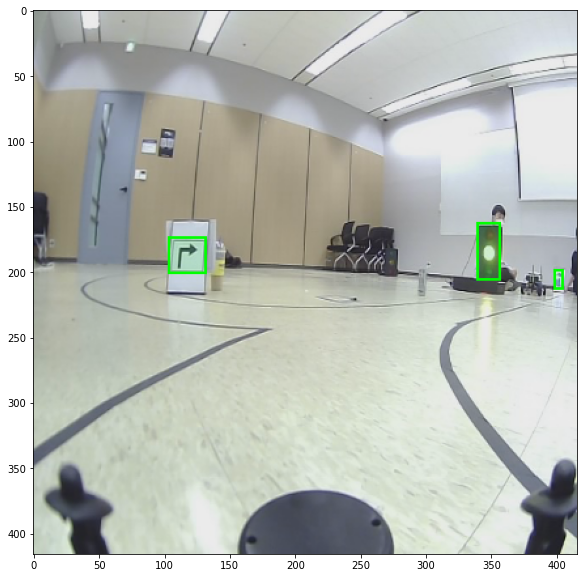

In [ ]:
for i in range(40, 60):
  control(object_detector[i], i)